

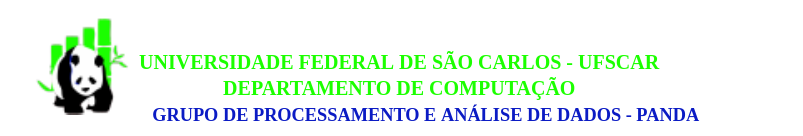


# **Conceitos Básicos - Séries Temporais**

##**Definição**

O que é uma série temporal ?
- Uma série temporal é uma sequência de observações ou dados coletados ao longo do tempo em intervalos regulares ou irregulares. Esses dados são tipicamente ordenados em uma escala temporal, onde cada observação está associada a um ponto específico no tempo. A série temporal é comumente utilizada em várias áreas, como economia, finanças, meteorologia, ciências sociais, engenharia, medicina, entre outras.

## **Caracteríticas de uma série temporal**

- **Intervalo Regular ou Irregular:** As séries temporais podem ter intervalos de tempo regulares, como dados coletados a cada hora, dia ou mês, ou intervalos irregulares, onde as observações não ocorrem em intervalos uniformes.
- **Tendência:** Refere-se a uma direção geral ou padrão de crescimento ou declínio nos dados ao longo do tempo. Pode ser ascendente (crescente), descendente (decrescente) ou horizontal (constante).
-**Sazonalidade:** É a repetição de padrões ou flutuações que ocorrem em intervalos regulares ao longo do tempo, geralmente associada a ciclos anuais, trimestrais, mensais ou semanais.
-**Ruído:** Representa a variação aleatória nos dados que não pode ser explicada por tendência ou sazonalidade. O ruído pode ser causado por fatores externos imprevisíveis e influências estocásticas.

## **Por que analisar uma série temporal?**



1.   Previsão de Tendências e Padrões
2.   Detecção de Anomalias
3.   Planejamento e Otimização de Recursos
4.   Monitoramento de Desempenho
5.   Modelagem e Previsão de Riscos
6.   Análise de Dados de Sensores e IoT
7.   Validação de Modelos de Aprendizado de Máquina



## **Estacionariedade**

 Uma série temporal é considerada estacionária se satisfizer as seguintes condições:

*   **Média constante:** A média da série não deve ser uma
função do tempo.
*   **Variância constante:** A variância da série também não deve variar em função do tempo, essa característica é chamada de homocedasticidade.

*   **Autocorrelação independente do tempo:** A covariância dos termos i-ésimo e (i+m)-ésimo não deve ser uma função dependente do tempo. A correlação entre dois pontos em uma série temporal é a mesma, independente do período em que estejam localizados.

 Realizar testes de estacionariedade, como o Teste de Dickey-Fuller Aumentado (ADF) ou o Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin), usando bibliotecas como statsmodels.tsa.stattools para verificar se a série é estacionária. Se a série não for estacionária, pode ser necessário aplicar técnicas de diferenciação para torná-la estacionária.

### **Exemplo de código**

Resultado do teste ADF:
Estatística do teste: -7.61291811137007
Valor p: 2.230463076874018e-11
Valores críticos: {'1%': -3.4989097606014496, '5%': -2.891516256916761, '10%': -2.5827604414827157}
A série é estacionária (rejeita a hipótese nula)


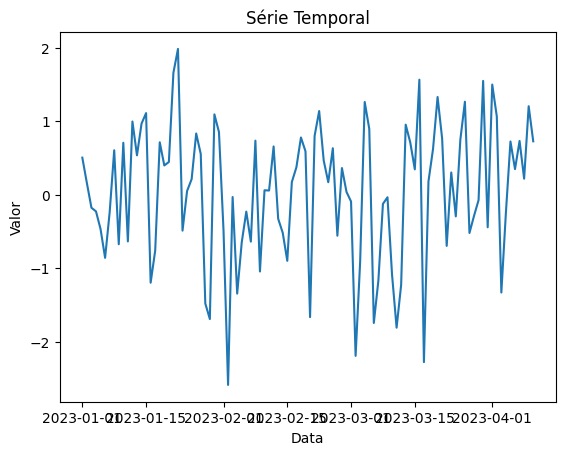

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Exemplo de uma série temporal não estacionária
# Você pode substituir esses dados por sua própria série temporal
data = pd.Series(np.random.randn(100), index=pd.date_range(start='2023-01-01', periods=100, freq='D'))

# Função para realizar o teste ADF
def testa_estacionariedade_serie_temporal(serie_temporal):
    # Realiza o teste ADF
    resultado_teste = adfuller(serie_temporal, autolag='AIC')

    # Extrai e imprime os resultados
    print('Resultado do teste ADF:')
    print('Estatística do teste:', resultado_teste[0])
    print('Valor p:', resultado_teste[1])
    print('Valores críticos:', resultado_teste[4])

    # Verifica o resultado do teste
    if resultado_teste[1] <= 0.05:
        print("A série é estacionária (rejeita a hipótese nula)")
    else:
        print("A série não é estacionária (falha em rejeitar a hipótese nula)")

# Teste de estacionariedade na série temporal
testa_estacionariedade_serie_temporal(data)

# Plot da série temporal
plt.plot(data)
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Série Temporal')
plt.show()

***Interpretações:***

1.  **ADF < valor crítico e p-valor < nível de significância (padrão 0,05) :** rejeita-se a hipótese nula de que a série possui raiz unitária e considera-se que a série é estacionária
2.    **ADF > valor crítico e e p-valor > nível de significância (padrão 0,05) :** não se rejeita a hipótese nula de que a série possui raiz unitária e considera-se que a série não é estacionária.
3.    **ADF ~ valor crítico e p-valor ~ nível de significância (padrão 0,05) :**  a série pode ser considerada marginalmente estacionária ou a decisão pode ser inconclusiva. Serão necessários outros testes;
4.    **observação:** pode-se considerar p-valor padrão de 0,05;

## **Autocorrelação**

- A autocorrelação é uma medida estatística que descreve a relação entre os valores passados de uma série temporal e seus valores atuais. Em outras palavras, ela mede a correlação entre os elementos da série temporal e seus próprios valores anteriores em diferentes intervalos de tempo.
- A função de autocorrelação (ACF) é uma das ferramentas mais comuns usadas para medir a autocorrelação em uma série temporal. A ACF mede a correlação entre o valor atual e os valores em atraso (lag) em diferentes intervalos.


### **Autocorrelação(ACF) x Autocorrelação parcial(PACF)**

A Autocorrelação (ACF) mede a correlação entre os valores passados de uma série temporal e o valor atual, em diferentes intervalos de tempo.

A Autocorrelação Parcial (PACF) mede a correlação direta entre os valores passados de uma série temporal e o valor atual, removendo a influência de valores intermediários.

A ACF não leva em conta os efeitos de valores intermediários, o que pode dificultar a identificação da ordem de um modelo AR (AutoRegressive).

A PACF é especialmente útil para identificar a ordem de um modelo AR, pois ajuda a encontrar os lags mais relevantes para prever a série, ao considerar apenas a correlação direta entre os valores em diferentes atrasos.

### **Exemplo de código**

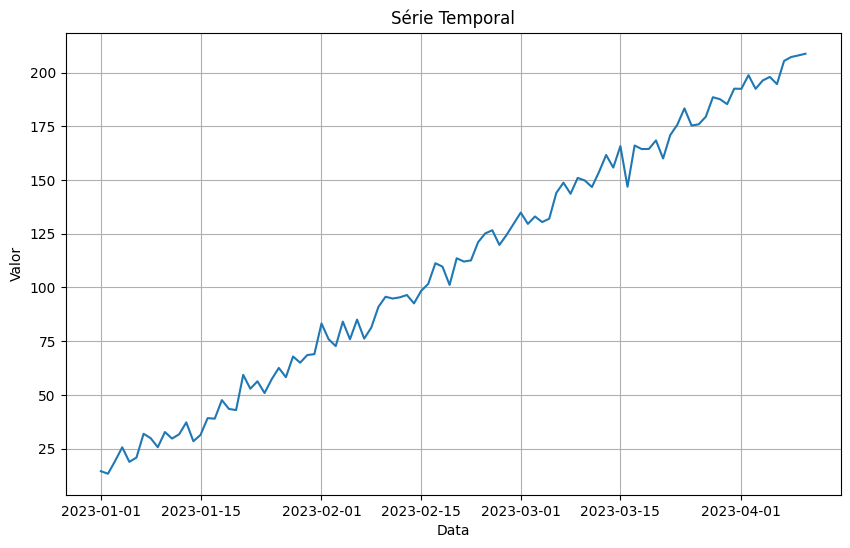

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
np.random.seed(42)  # Para reprodutibilidade dos resultados
t = np.arange(1, 101)
serie_temporal = 2 * t + 10 + np.random.normal(scale=5, size=len(t))
data = pd.DataFrame({'Valor': serie_temporal}, index=pd.date_range(start='2023-01-01', periods=100, freq='D'))
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Valor'])
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Série Temporal')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


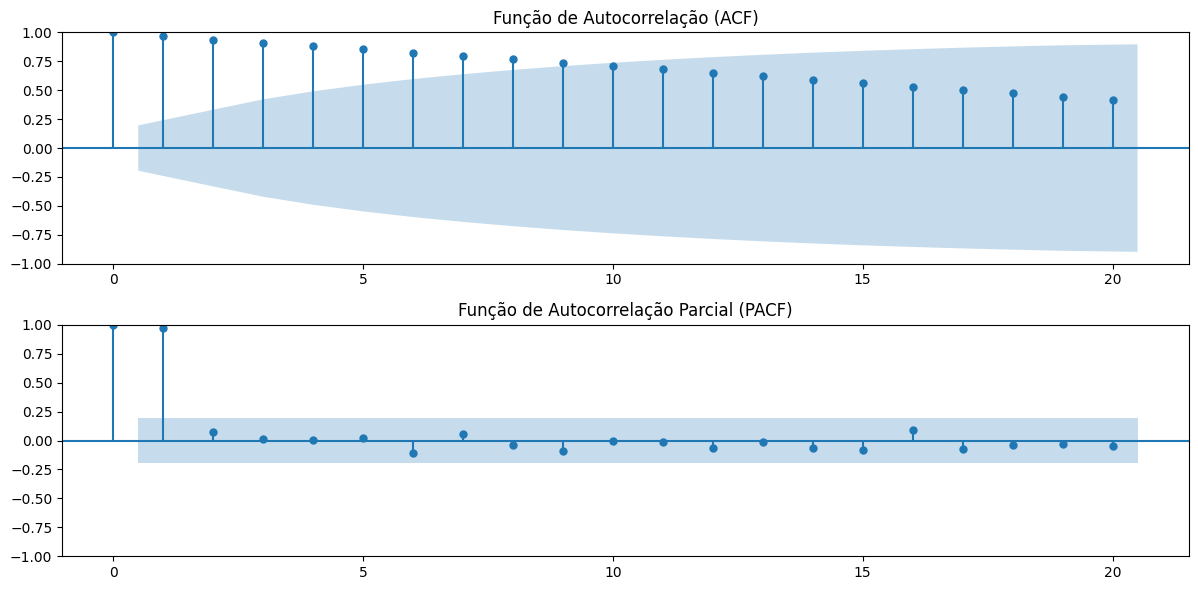

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(data['Valor'], lags=20, ax=plt.gca(), alpha=0.05)
plt.title('Função de Autocorrelação (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(data['Valor'], lags=20, ax=plt.gca(), alpha=0.05)
plt.title('Função de Autocorrelação Parcial (PACF)')

plt.tight_layout()
plt.show()
